# Este caso de estudio servirá para demostrar el uso del paquete AutoGluon que permite llevar a cabo un prototipado rápido de moodelos de Aprendizaje de Máquina (ML)

## IMPORTAR LIBRERIAS Y CONJUNTO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Para que funcione Autogluon en Google Colab, es necesario instalar ipkernel y reiniciar el Notebook
# El kernel IPython es el backend de ejecución para Jupyter

!pip install -U ipykernel

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.26 requires setuptools~=60.2.0, but you have setuptools 68.2.2 which is incompatible.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2009 lines of output]
      Running from numpy source directory.
      C:\Users\juanc\AppData\Local\Temp\pip-install-pkgdz4oa\numpy_a1b2d90ddc184813a2ade78805f8cbc4\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'C:\\Users\\juanc\\AppData\\Local\\Programs\\Python\\Python310\\libs', 'C:\\src\\vcpkg\\installed\\x64-windows\\lib']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCComp

     ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
     - ----------------------------------- 41.0/953.1 kB 960.0 kB/s eta 0:00:01
     ----- -------------------------------- 143.4/953.1 kB 1.7 MB/s eta 0:00:01
     -------------- ----------------------- 358.4/953.1 kB 3.2 MB/s eta 0:00:01
     -------------------- ----------------- 512.0/953.1 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 953.1/953.1 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [4]:
!pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
seguros = pd.read_csv('diabetes.csv')

## ENTRENAR MULTIPLES MODELOS UTILANDO AUTOGLUON

In [7]:
# Dividir los datos en un 80% para entrenamiento y 20% para pruebas

from sklearn.model_selection import train_test_split
X_entreno, X_prueba = train_test_split(seguros, test_size=0.2, random_state=0)

In [8]:
X_entreno

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [9]:
X_prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


#### Definimos el modelo como binary, que es el modelo relacionado con la clasificacion, ademas definimos las metricas de evaluacion como accuracy

In [12]:
predictor = TabularPredictor(label="Outcome", 
                             problem_type = 'binary', 
                             eval_metric = 'accuracy').fit(train_data = X_entreno, 
                                                     presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20231015_143153\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231015_143153\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   220.87 GB / 998.60 GB (22.1%)
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    18241.72 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featu

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.057312  5.800071                0.000000           0.689539            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.041305  3.472239                0.041305           3.472239            1       True         10
2           CatBoost_BAG_L1   0.781759       0.016004  2.100042                0.016004           2.100042            1       True          7
3           LightGBM_BAG_L1   0.780130       0.000000  0.816777                0.000000           0.816777            1       True          4
4         LightGBMXT_BAG_L1   0.780130       0.016136  0.734489                0.016136           0.734489            1       True          3
5            XGBoost_BAG_L1   0.773616       0.016007  1.638294                0.01600

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.7801302931596091,
  'LightGBM_BAG_L1': 0.7801302931596091,
  'R

## EVALUAR EL RENDIMIENTO DE LOS MODELOS ENTRENADOS

In [14]:
predictor.leaderboard()

                      model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.057312  5.800071                0.000000           0.689539            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.041305  3.472239                0.041305           3.472239            1       True         10
2           CatBoost_BAG_L1   0.781759       0.016004  2.100042                0.016004           2.100042            1       True          7
3           LightGBM_BAG_L1   0.780130       0.000000  0.816777                0.000000           0.816777            1       True          4
4         LightGBMXT_BAG_L1   0.780130       0.016136  0.734489                0.016136           0.734489            1       True          3
5            XGBoost_BAG_L1   0.773616       0.016007  1.638294                0.016007           1.638294            1       True         11
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.793160,0.057312,5.800071,0.000000,0.689539,2,True,14
1,NeuralNetFastAI_BAG_L1,0.788274,0.041305,3.472239,0.041305,3.472239,1,True,10
2,CatBoost_BAG_L1,0.781759,0.016004,2.100042,0.016004,2.100042,1,True,7
3,LightGBM_BAG_L1,0.780130,0.000000,0.816777,0.000000,0.816777,1,True,4
4,LightGBMXT_BAG_L1,0.780130,0.016136,0.734489,0.016136,0.734489,1,True,3
5,XGBoost_BAG_L1,0.773616,0.016007,1.638294,0.016007,1.638294,1,True,11
6,LightGBMLarge_BAG_L1,0.763844,0.007997,2.234898,0.007997,2.234898,1,True,13
7,NeuralNetTorch_BAG_L1,0.763844,0.040078,5.064461,0.040078,5.064461,1,True,12
8,RandomForestEntr_BAG_L1,0.757329,0.104801,0.682396,0.104801,0.682396,1,True,6
9,RandomForestGini_BAG_L1,0.745928,0.160072,1.125002,0.160072,1.125002,1,True,5


                      model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.793160       0.057312  5.800071                0.000000           0.689539            2       True         14
1    NeuralNetFastAI_BAG_L1   0.788274       0.041305  3.472239                0.041305           3.472239            1       True         10
2           CatBoost_BAG_L1   0.781759       0.016004  2.100042                0.016004           2.100042            1       True          7
3           LightGBM_BAG_L1   0.780130       0.000000  0.816777                0.000000           0.816777            1       True          4
4         LightGBMXT_BAG_L1   0.780130       0.016136  0.734489                0.016136           0.734489            1       True          3
5            XGBoost_BAG_L1   0.773616       0.016007  1.638294                0.016007           1.638294            1       True         11
6     

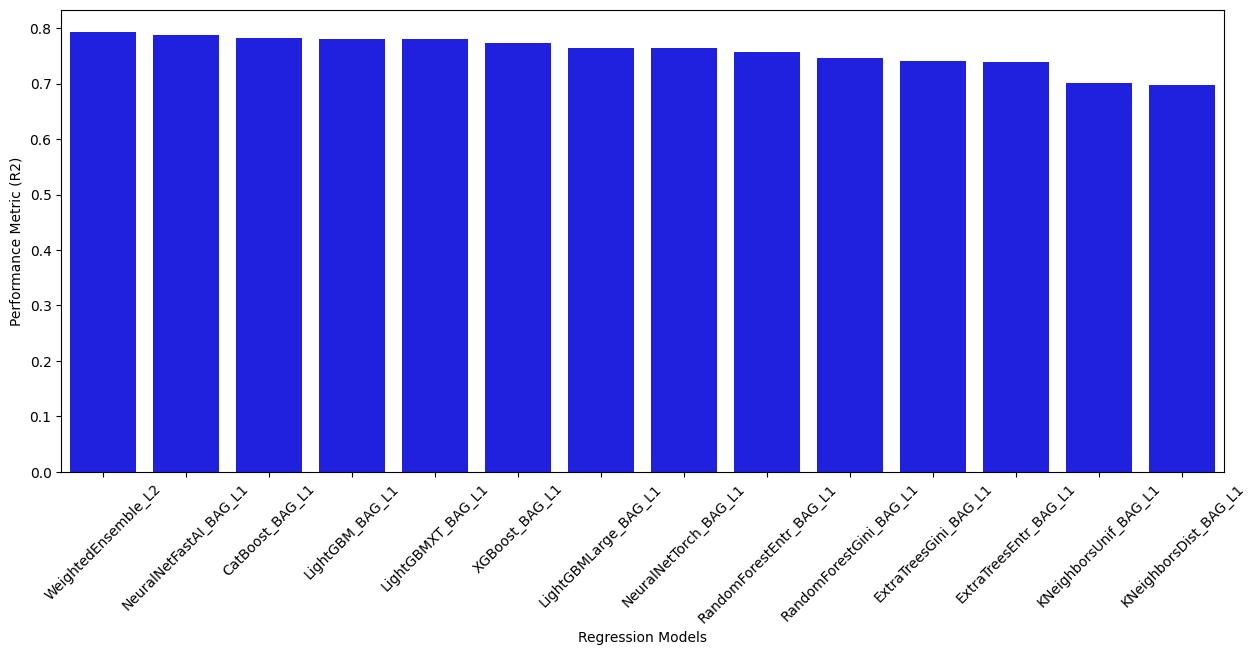

In [15]:
# Inicializar la figura de matplotlib

f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45)

In [16]:
predictor.evaluate(X_prueba)

Evaluation: accuracy on test data: 0.8311688311688312
Evaluations on test data:
{
    "accuracy": 0.8311688311688312,
    "balanced_accuracy": 0.7890236627560151,
    "mcc": 0.5933466528277093,
    "roc_auc": 0.86438655796381,
    "f1": 0.711111111111111,
    "precision": 0.7441860465116279,
    "recall": 0.6808510638297872
}


{'accuracy': 0.8311688311688312,
 'balanced_accuracy': 0.7890236627560151,
 'mcc': 0.5933466528277093,
 'roc_auc': 0.86438655796381,
 'f1': 0.711111111111111,
 'precision': 0.7441860465116279,
 'recall': 0.6808510638297872}

In [17]:
# Evaluar el rendimiento de los modelos
# Seleccionar 5 observaciones del conjunto de datos de prueba y generar las predicciones

y_pred = predictor.predict(X_prueba)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [1, 0, 0, 1, 0]


In [18]:
X_prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [19]:
y_prueba = X_prueba['Outcome']
y_prueba # valores correctos

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

#### Para poder observar los resultados, desplegamos la matriz de confusion

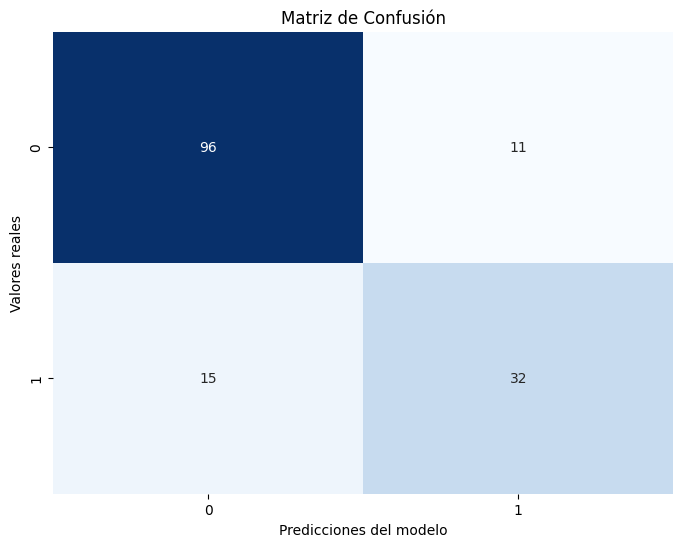

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm = confusion_matrix(y_prueba, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones del modelo')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()
